In [ ]:
import numpy as np
from IPython.display import display, Markdown

In [ ]:
from OCC.Display.WebGl.jupyter_renderer import JupyterRenderer
from tigl3 import tigl3wrapper
import tigl3.configuration

In [ ]:
def plotXML(s):
    formatted_string = f'```\n{s}\n```'
    display(Markdown(formatted_string))

In [ ]:
def plotWing(tixi_h):
    tigl_h = tigl3wrapper.Tigl3()
    tigl_h.open(tixi_h,"")
    
    mgr = tigl3.configuration.CCPACSConfigurationManager_get_instance()
    aircraft_config = mgr.get_configuration(tigl_h._handle.value)
    wing = aircraft_config.get_wing(1)
    wing_shape = wing.get_loft()
    
    renderer = JupyterRenderer(size=(700,700))
    renderer.DisplayShape(wing_shape.shape(), transparency=True,render_edges=True)
    renderer.Display()

In [ ]:
def saveIntermediate(tixi_h):
    s = tixi_h.exportDocumentAsString()
    with open("wing_modified.xml","w") as f:
        f.write(s)
        f.close()

## Open File with TiXI

In [ ]:
from tixi3 import tixi3wrapper

In [ ]:
tixi_h = tixi3wrapper.Tixi3()

In [ ]:
tixi_h.open("wing.xml")

## Transformation the element of section 2

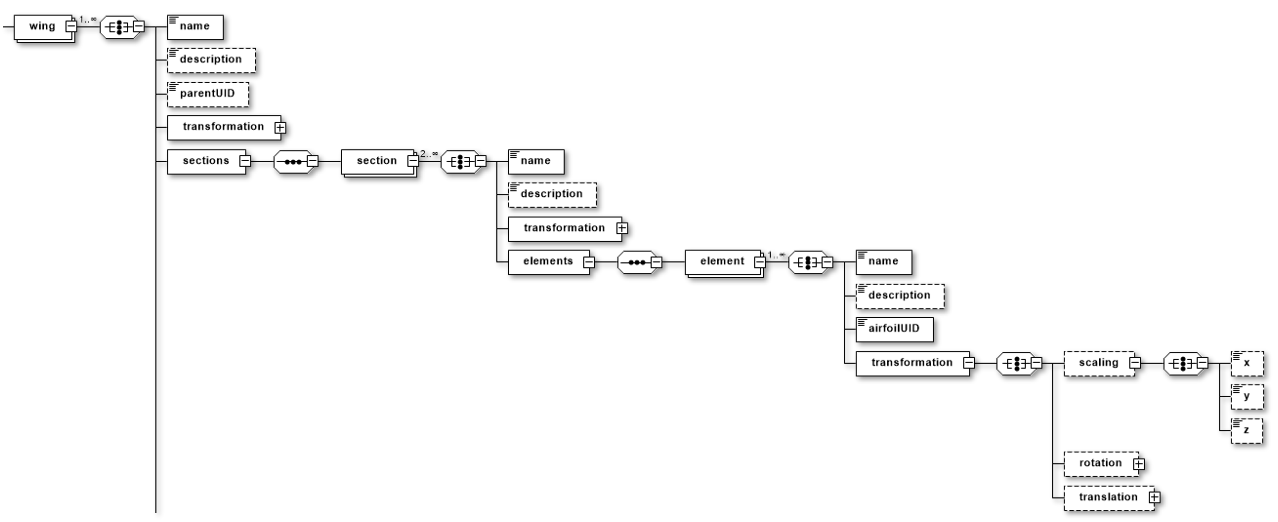

Get the XPath of the element. Maybe there is a smarter way than hard-coding the entire XPath?

In [ ]:
# element_xPath = ...

In [ ]:
# %load ./resources/solutions/getElementXPath.py

Add a scaling of the element profile of 0.5 in x and z:

In [ ]:
# ...
# - create a node "scaling" as a child of transformation
# - add double element "x" with 0.5
# - add double element "z" with 0.5

In [ ]:
# %load ./resources/solutions/addScaling.py

Update the sweep Angle to 22.5deg:

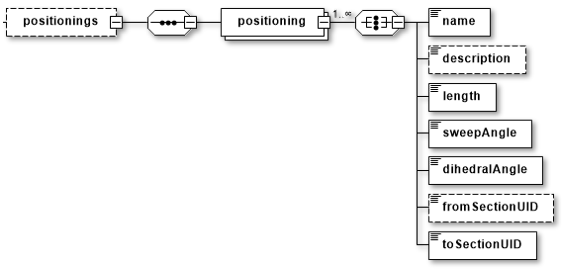

In [ ]:
# ...
# - define the xPath of the positioning element
# - update the "sweepAngle" element with 22.5

In [ ]:
# %load ./resources/solutions/updateSweepAngle.py

In [ ]:
try:
    s = tixi_h.exportElementAsString(element_xPath)
    plotXML(s)
except:
    print("element_xPath not yet defined")

In [ ]:
plotWing(tixi_h)

## Add Winglet

To display the XML solution uncomment the following line:

In [ ]:
# %load ./resources/solutions/showXMLSolution.py

### Section & Element

In [ ]:
wing_xPath = tixi_h.uIDGetXPath("wing1")

In [ ]:
# ...
# Add new section:
# - add a third section
# - add a section uID and name element
# 
# Rotate the section by 45deg:
# - create "transformation" element as child of the new section
# - add "rotation" element to "transformation"
# - add a rotation around x by 45deg
# 
# Add element to the new section using the pre-defined NACA0009:
# - add "elements/element" as children of the new section
# - add uID and name element to the new "element"
# - add "airfoildUID" and link the pre-defined "NACA0009"
# - add transformation node
#
# Scale the element
# - add "transformation/scaling"
# - add "scaling/x" with 0.2
# - add "scaling/y" with 0.2

In [ ]:
# %load ./resources/solutions/addSection.py

In [ ]:
saveIntermediate(tixi_h)

### Positioning

In [ ]:
# ...
# - create a second "positionings/positioning" element
# - add uID and name
# - add length = 0.25
# - add sweepAngle = 70.
# - add dihedralAngle = 45.
# - add fromSectionUID = wing1section2
# - add toSectionUID = wing1section3

In [ ]:
# %load ./resources/solutions/addPositioning.py

In [ ]:
saveIntermediate(tixi_h)

### Segment

In [ ]:
# ...
# - create a second "/segments/segment" element
# - add uID and name elements
# - add fromElementUID = wing1section2element1
# - add toElementUID = wing1section3element1

In [ ]:
# %load ./resources/solutions/addSegment.py

In [ ]:
saveIntermediate(tixi_h)

In [ ]:
plotWing(tixi_h)

In [ ]:
tixi_h.save("wing_modified.xml")